Reference: https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb

## Gathering

In [2398]:
import tweepy
import json
import time
import datetime
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

There are three data sets to deal with in this project
- twitter-archive-enhanced.csv
- predictions.tsv
- tweets from twitter api using twitter-archive tweet_id

Goal and summary:

    Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.the twitter arhcive dataset is good but it is missing some information where we will gather using Twitter API and tweepy library to fetch some information like retweet and favorite count
    image_predictions which is a an implementation of nerual network for predicting the images in each tweet and hosted on Udacity servers, we will download this data programmatically using Response library and the following url  
    `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`

### Twitter Archive Data

It is provided as the starting point which we will read it using pandas

In [1704]:
archive_preClean = pd.read_csv('twitter-archive-enhanced.csv')

In [1705]:
archive_preClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1706]:
archive_preClean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


### Downloading image predictions file programmaticaly

This Data will be downloaded programmatically using Response library
Data is hosted on Udacity servers on the following url

In [250]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [1707]:
images_file = url.split('/')[-1]
with open(os.path.join('./', images_file), mode = 'wb') as file:
    file.write(response.content)
predictions_preClean = pd.read_csv(images_file, sep = '\t')
predictions_preClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1708]:
predictions_preClean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Downloading Tweets objects using tweepy and twitter API

###### Using tweepy and twitter API with the tweet_id from twitter-archive-clean we will be able to download tweets as json objects which we will save it later as a text file and read it in pandas dataframe

In [254]:
CONSUMER_KEY = 'glH6qII5teOdvRM2AWCbnT1xS'
CONSUMER_SECRET = 'KmygOq3wfkQtv4Y1ciNGoO6cNUyOg8n4zY7VgH41YD4Ttld6YO'
OAUTH_TOKEN = '1254147717770760192-qwIwUCm1CUzJomoQenF1N91j9h1SBi'
OAUTH_TOKEN_SECRET = 's1iEu89IXDhY3GM0IujGn796TlnPAqTKgVbHfB0uxE01S'

In [254]:
CONSUMER_KEY = 'Hidden'
CONSUMER_SECRET = 'Hidden'
OAUTH_TOKEN = 'Hidden'
OAUTH_TOKEN_SECRET = 'Hidden'

In [255]:
# Create the twitter API object and set rate limit params
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [1709]:
tweet_ids = archive_preClean.tweet_id.values

In [257]:

start_time = time.time()
tweet_jsonList = []
failed_tweets = []

for id in tweet_ids:
    try:
        tweet = api.get_status(id, tweet_mode = 'extended')
        tweet_jsonList.append(tweet._json)
        
    except tweepy.TweepError as error:
        failed_tweets.append({id: error})
        pass

time_taken = time.time() - start_time
print('Time Taken Extracting Tweets: ', time_taken)  
for err in failed_tweets:
    print(err)

Rate limit reached. Sleeping for: 42
Rate limit reached. Sleeping for: 257


Time Taken Extracting Tweets:  2337.3567638397217
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}
{844704788

28 failed tweets

In [1196]:
len(failed_tweets)

28

Tweet object looks like this

In [258]:
tweet_jsonList[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [1201]:
#json objects is more like python dictionaries with keys(columns) and values (row values)
for key in tweet_jsonList[0]:
    print(key)

created_at
id
id_str
full_text
truncated
display_text_range
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
possibly_sensitive_appealable
lang


In [1234]:
#Creating a file name `tweet_json.txt` to store json objects in and read into pandas dataframe using pd.read_json
#Saving it line by line to be human readable

with open('tweet_json.txt', 'w') as file:
    for tweet in tweet_jsonList:
        json.dump(tweet, file)
        file.write('\n')                

Reading Json file line by line appending required columns

In [2615]:
json_list = []
count = 0

with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():    
        data = json.loads(line)
        
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']

        json_list.append({'tweet_id': data_id,
                          'retweet_count': data_retweet_count,
                          'favorite_count': data_favorite_count})

In [2616]:
tweets_preClean = pd.DataFrame(json_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

In [2619]:
tweets_preClean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7547,35692
1,892177421306343426,5595,30867
2,891815181378084864,3707,23206
3,891689557279858688,7730,38989
4,891327558926688256,8329,37243


In [2620]:
tweets_preClean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [2618]:
tweets_preClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [1795]:
archive_preClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1796]:
tweets_preClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assess and Cleaning Data

### `Quality`
#### `Archive` 
- Erroneous datatype timestamp
- Erroneous datatpye dog_stage after melting object instead of category
- Erroneous tweet_id data type all tables( int instead of obj)
- Missing urls 
- inaccurate rating numerator
- inaccurate rating denominator
- retweets irrelevant column since we want to analyze tweets only
- replies irrevlevant column
- source unwanted text (extract test)
- dealing with duplicates after melting archive df while sorting the valid value

#### `Tweets`
- Missing tweets from queried tweets
- `Tweets` id column to tweet_id to match other tables ids convert to obj

#### `Predictions`
- only images that are predicted as dogs (p1_dog,p2_dog,p3_dog) = True

### Tidiness
#### `Archive`
- Five variables in 4 columns ['doggo', 'floofer', 'pupper', 'puppo]
- `Predictions` and `tweets` should be merged to `archive`, only wanted columns: retweet count, favorite count, p1_dog = True, p1, highest confidence interval
- Reorder column names, the longest the last for better readability and visual assessment
#### `Predictions`
- Only required data should be included( dog = True, with highest p confidence interval)

In [2622]:
archive = archive_preClean.copy()
tweets = tweets_preClean.copy()
predictions = predictions_preClean.copy()

In [2623]:
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [2624]:
archive.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [2625]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2192,668932921458302977,NaN,NaN,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Herald. He likes to swing. Subtle tongue slip. Owner good at b-ball. Creepy person on bench back there. 9/10 https://t.co/rcrKkL7eB6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668932921458302977/photo/1,9,10,Herald,None,None,None,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705894408192/photo/1,10,10,Derek,None,None,pupper,None
392,826115272272650244,NaN,NaN,2017-01-30 17:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ike. He's demonstrating the pupmost restraint. 13/10 super good boy https://t.co/6gHoGah9nm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826115272272650244/photo/1,13,10,Ike,None,None,None,None
2141,669993076832759809,NaN,NaN,2015-11-26 21:36:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669993076832759809/photo/1,9,10,Zoey,None,None,None,None
1431,697516214579523584,NaN,NaN,2016-02-10 20:23:19 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Say hello to Pherb. He does parkour. 9/10 https://t.co/LHFfUyLBZT,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,None,None,None,None


In [2626]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

 ****`Convert timestamp to datetime instead of obj`****

****Convert Timestamp to datetime**** 

In [2628]:
archive.timestamp = pd.to_datetime(archive.timestamp)
archive.tweet_id = archive.tweet_id.astype(object)
tweets.tweet_id = tweets.tweet_id.astype(object)
predictions.tweet_id = predictions.tweet_id.astype(object)

In [2629]:
archive[['tweet_id','timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2356 non-null   object             
 1   timestamp  2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 36.9+ KB


In [2636]:
tweets.tweet_id.dtype, predictions.tweet_id.dtype

(dtype('O'), dtype('O'))

In [2638]:
archive.timestamp.dtype

datetime64[ns, UTC]

In [2639]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

****Checking missing urls tweets**** 

In [2640]:
missing_urlIds = archive[archive.expanded_urls.isna() & archive.in_reply_to_status_id.isna()\
                & archive.retweeted_status_id.isna()].tweet_id.values

In [2641]:
predictions[predictions.tweet_id.isin(missing_urlIds)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [2642]:
tweets[tweets.id.isin(missing_urlIds)]

AttributeError: 'DataFrame' object has no attribute 'id'

In [ ]:
test = pd.read_json('tweet_json.txt', lines=True)[['id','entities']]

In [ ]:
test[test.id.isin(missing_urlIds)]

There is nothing we can do in terms of finding the missing urls since they are not in the predictions df nor the json file as declared above

In [ ]:
del test

In [ ]:
archive.columns

****Reordering Archive columns****

In [ ]:
last_columns = ['timestamp','source','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','text','expanded_urls']


archive = archive[[col for col in archive if col not in last_columns]+[col for col in last_columns if col in archive]]


In [2643]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


***Dropping retweets and reply from the dataframe***
- Replies or retweets will have values either in in_reply_to_status_id or retweeted_status_id

In [2644]:
re_indices = archive[archive.in_reply_to_status_id.notnull() | archive.retweeted_status_id.notnull()].index

In [2645]:
archive.drop(index = re_indices,axis = 0, inplace = True)

In [2646]:
archive[archive.index.isin(re_indices)].tweet_id.sum()

0

In [2647]:
archive.shape

(2097, 17)

In [2648]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

***Dropping unwanted columns related to retweets and replies***

In [2649]:
archive.drop(['retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'
              ,'retweeted_status_user_id'], axis=1, inplace=True)

In [2650]:
archive.duplicated(subset='tweet_id').sum()

0

In [2651]:
archive.rating_numerator.value_counts().sort_index()

0         1
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        98
9       153
10      436
11      413
12      486
13      287
14       38
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [2652]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [2653]:
archive[archive.rating_numerator > 14][['rating_numerator','rating_denominator','text']]

,rating_numerator,rating_denominator,text
433,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
979,1776,10,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1120,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1202,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12


- 433 - multiple
- 516 - None
- 695 - 9.75
- 763 - 11.27
- 902 - multiple
- 979 - 1776!
- 1120 - multiple
- 1202 - 11
- 1228 - None
- 1254 - multiple
- 1274 - multiple
- 1351 - multiple
- 1433 - multiple
- 1635 - multiple
- 1712 - multiple
- 1779 - multiple
- 1843 - multiple
- 2074 - 420

As it seems, there are multiple dogs in one tweet that have different ratings, I will drop the multiple dog tweets and fix some issues as mentioned above

That is 22 tweets of multiple dogs + 2 without rating

In [2654]:
multiple_dogs_id = archive.query('(doggo != "None" & floofer != "None") | (doggo != "None" & pupper != "None")\
                    | (doggo != "None" & puppo !="None") \
                    | (floofer != "None" & pupper != "None") | (floofer != "None" & puppo != "None") \
                    | (pupper != "None" & puppo !="None") ').tweet_id.index

In [2655]:
multiple_dogs_id.shape[0]

11

In [2656]:
drop_tweetId = np.append(multiple_dogs_id, [433, 516, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1712, 1779, 1843])

In [2657]:
archive = archive.drop(index = drop_tweetId, axis = 0)


In [2658]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2070 non-null   object             
 5   rating_numerator    2073 non-null   int64              
 6   rating_denominator  2073 non-null   int64              
 7   name                2073 non-null   object             
 8   doggo               2073 non-null   object             
 9   floofer             2073 non-null   object             
 10  pupper              2073 non-null   object             
 11  puppo               2073 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

- 695 - 9.75
- 763 - 11.27
- 979 - 1776!
- 1202 - 11
- 2074 - 420


In [2659]:
#manually changing values as observed
archive.loc[695,'rating_numerator'] = 9.75
archive.loc[763,'rating_numerator'] = 11.27
archive.loc[1202,'rating_numerator'] = 11

In [2660]:
archive.loc[archive.tweet_id.isin(multiple_dogs_id)][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator


In [2661]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [2662]:
#checking denominator values
archive[archive.rating_denominator != 10].rating_denominator.value_counts()

11    2
2     1
20    1
50    1
Name: rating_denominator, dtype: int64

In [2663]:
archive[archive.rating_denominator!=10][['rating_numerator','rating_denominator','text']]

,rating_numerator,rating_denominator,text
1068,9.0,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1165,4.0,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,11.0,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1662,7.0,11,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2335,1.0,2,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


- 1068 - n=14, d=10
- 1165 - n=13, d=10
- 1202 - d = 50
- 1662 - n=10, d =10
- 2335 - 9,10

In [2664]:
archive.loc[1068, ['rating_numerator','rating_denominator']] = [14,10] 
archive.loc[1165, ['rating_numerator','rating_denominator']] = [13,10] 
archive.loc[1202,'rating_denominator'] = 10
archive.loc[1662, ['rating_numerator','rating_denominator']] = [10,10]
archive.loc[2335, ['rating_numerator','rating_denominator']] = [9,10]

In [2665]:
archive[archive.rating_denominator!=10][['rating_numerator','rating_denominator','text']]

,rating_numerator,rating_denominator,text


In [2666]:
archive.rating_numerator.value_counts().sort_index()

0.00         1
1.00         4
2.00         9
3.00        19
4.00        15
5.00        33
6.00        32
7.00        51
8.00        98
9.00       153
9.75         1
10.00      436
11.00      413
11.27        1
12.00      480
13.00      286
14.00       39
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

In [2667]:
archive[(archive.rating_numerator < 3) |(archive.rating_numerator > 14) ][['rating_numerator','rating_denominator','text']]

,rating_numerator,rating_denominator,text
315,0.0,10,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
979,1776.0,10,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1761,2.0,10,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r
1764,2.0,10,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
1869,1.0,10,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
1920,2.0,10,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ
2074,420.0,10,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
2079,2.0,10,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT"
2091,1.0,10,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
2237,2.0,10,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2


In [2668]:
archive.rating_denominator.value_counts()

10    2073
Name: rating_denominator, dtype: int64

After adjusting few tweets manually we seem to have regular values except for the 1776 and 402 which we will exclude later through visualization

We can now drop the denominator change column rating_numerator to rating

In [2669]:
archive.drop('rating_denominator', inplace=True, axis = 1)

In [2670]:
archive.rename(columns = {'rating_numerator':'rating'}, inplace=True)

converting rating to int and rounding to 2 decimals

In [2671]:
archive.rating = archive.rating.round(2).astype('int')

In [2672]:
ids = archive[archive.rating>20].index

In [2673]:
archive.drop(index = ids, inplace=True, axis = 0)

In [2674]:
archive.rating.value_counts().sort_index()

0       1
1       4
2       9
3      19
4      15
5      33
6      32
7      51
8      98
9     154
10    436
11    414
12    480
13    286
14     39
Name: rating, dtype: int64

***Extracting wanted string from source column using REGEX***

In [2675]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1940
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Fix source column, extracting only wanted string we only want the string between `>` and `</a>`

In [2676]:
archive.source = archive.source.str.extract('^<a.+>(\D+)</a>$')

In [2677]:
archive.source.value_counts()

Twitter for iPhone     1940
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [2678]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

***Drop dog_stages columns into one variable to avoid breaking tidiness law of Each type of observational unit makes a Table***

In [2679]:
archive = archive.melt(id_vars = ['tweet_id','rating','name','timestamp',
                            'source','text','expanded_urls'], value_name = 'dog_stage')
archive.drop('variable', axis=1, inplace=True)

In [2680]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8284 entries, 0 to 8283
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       8284 non-null   object             
 1   rating         8284 non-null   int32              
 2   name           8284 non-null   object             
 3   timestamp      8284 non-null   datetime64[ns, UTC]
 4   source         8284 non-null   object             
 5   text           8284 non-null   object             
 6   expanded_urls  8272 non-null   object             
 7   dog_stage      8284 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), object(6)
memory usage: 485.5+ KB


In [2681]:
archive = archive.sort_values('dog_stage', ascending=False).drop_duplicates(subset='tweet_id', keep = 'first')

by sorting values we will always keep the row of duplicated Id with a value in dog_stage first then we drop the rest

In [2682]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 6954 to 4183
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2071 non-null   object             
 1   rating         2071 non-null   int32              
 2   name           2071 non-null   object             
 3   timestamp      2071 non-null   datetime64[ns, UTC]
 4   source         2071 non-null   object             
 5   text           2071 non-null   object             
 6   expanded_urls  2068 non-null   object             
 7   dog_stage      2071 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), object(6)
memory usage: 137.5+ KB


### Predictions

In [2683]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [2684]:
predictions_preClean.query('(p1_conf > 0.9) & (p1_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,5.206580e-05,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,4.608630e-04,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,5.682650e-03,True
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,3.481510e-03,False
1906,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,1,barbell,0.971581,False,dumbbell,0.028418,False,go-kart,5.595040e-07,False
1940,860924035999428608,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,1.117850e-02,False


In [2685]:
"""conditions = [(predictions.p1_dog == True), 
              (predictions.p2_dog==True),
              (predictions.p3_dog == True)]

#Choices for predictions
choices_p = [(predictions.p1),
           (predictions.p2),
           (predictions.p3)]

choices_c = [(predictions.p1_conf),
            (predictions.p2_conf),
            (predictions.p3_conf)]

predictions['type'] = np.select(conditions, choices_p, default = np.nan)
predictions['confidence'] =  np.select(conditions, choices_c, default = 0

"""
#There is an excellent approach if the tweets are only for dogs but there are multiple tweets where there is a turtlee, a hen,..
#a picture of a tweet
#reference at the top of the page

"conditions = [(predictions.p1_dog == True), \n              (predictions.p2_dog==True),\n              (predictions.p3_dog == True)]\n\n#Choices for predictions\nchoices_p = [(predictions.p1),\n           (predictions.p2),\n           (predictions.p3)]\n\nchoices_c = [(predictions.p1_conf),\n            (predictions.p2_conf),\n            (predictions.p3_conf)]\n\npredictions['type'] = np.select(conditions, choices_p, default = np.nan)\npredictions['confidence'] =  np.select(conditions, choices_c, default = 0\n\n"

In [2686]:
predictions = predictions_preClean.copy()

In [2687]:
predictions[predictions.p1_dog == True].p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
silky_terrier           1
clumber                 1
standard_schnauzer      1
Scotch_terrier          1
EntleBucher             1
Name: p1, Length: 111, dtype: int64

In [2688]:
predictions[predictions.p2_dog == True].p1.value_counts()

golden_retriever      148
Labrador_retriever     89
Pembroke               83
Chihuahua              65
pug                    47
                     ... 
brown_bear              1
cowboy_hat              1
soccer_ball             1
conch                   1
badger                  1
Name: p1, Length: 189, dtype: int64

In [2689]:
predictions[predictions.p3_dog == True].p1.value_counts()

golden_retriever      127
Labrador_retriever     86
Pembroke               83
Chihuahua              66
pug                    47
                     ... 
soccer_ball             1
hog                     1
toyshop                 1
goose                   1
canoe                   1
Name: p1, Length: 195, dtype: int64

Renaming `tweets` id to tweet_id to match the rest to be merged with

In [2690]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [2691]:
tweets.rename(columns = {'id': 'tweet_id'},inplace=True)

In [2692]:
tweets.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [2693]:
archive = pd.merge(archive, tweets,how = 'inner', on = 'tweet_id')
archive = pd.merge(archive, predictions,how = 'inner', on = 'tweet_id')

In [2694]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 1936
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1937 non-null   object             
 1   rating          1937 non-null   int32              
 2   name            1937 non-null   object             
 3   timestamp       1937 non-null   datetime64[ns, UTC]
 4   source          1937 non-null   object             
 5   text            1937 non-null   object             
 6   expanded_urls   1937 non-null   object             
 7   dog_stage       1937 non-null   object             
 8   retweet_count   1937 non-null   int64              
 9   favorite_count  1937 non-null   int64              
 10  jpg_url         1937 non-null   object             
 11  img_num         1937 non-null   int64              
 12  p1              1937 non-null   object             
 13  p1_conf         1937 non-null   f

In [2695]:
condition1 = predictions[columns].sum(axis=1)<2
condition2 = predictions[columns].sum(axis=1)>=1

In [2696]:
predictions[condition1 & condition2]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False


485 entries with only 1 of 3 algorithms classified as dog

In [2697]:
condition = predictions[columns].sum(axis=1) == 1
predictions[condition]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False


161 entries correctly classified as dog once

In [2698]:
predictions[columns].sum(axis=0)

p1_dog    1532
p2_dog    1553
p3_dog    1499
dtype: int64

In [2699]:
predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [2700]:
predictions[predictions.p1_dog == True].p1.value_counts()[:20]

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
Name: p1, dtype: int64

In [2701]:
last_columns = ['timestamp','source','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','text','jpg_url','expanded_urls']


archive = archive[[col for col in archive if col not in last_columns]+[col for col in last_columns if col in archive]]


In [2702]:
archive.head()

,tweet_id,rating,name,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,jpg_url,expanded_urls
0,751132876104687617,10,Cooper,puppo,1284,5015,1,Labrador_retriever,0.929390,True,...,0.038254,True,golden_retriever,0.007610,True,2016-07-07 19:16:47+00:00,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10 what's your secret puppo? https://t.co/yToDwVXEpA,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,"https://twitter.com/dog_rates/status/751132876104687617/photo/1,https://twitter.com/dog_rates/status/751132876104687617/photo/1"
1,867421006826221569,12,Shikha,puppo,2286,15114,1,Eskimo_dog,0.616457,True,...,0.381330,True,malamute,0.001670,True,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,https://twitter.com/dog_rates/status/867421006826221569/photo/1
2,825026590719483904,12,Pablo,puppo,1242,6279,2,Eskimo_dog,0.524454,True,...,0.467678,True,malamute,0.004976,True,2017-01-27 17:04:02+00:00,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1"
3,743253157753532416,10,Kilo,puppo,1198,4161,1,malamute,0.442612,True,...,0.368137,True,Eskimo_dog,0.177822,True,2016-06-16 01:25:36+00:00,Twitter for iPhone,"This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo https://t.co/gSmp31Zrsx",https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,https://twitter.com/dog_rates/status/743253157753532416/photo/1
4,793195938047070209,12,Lily,puppo,5651,15355,2,Labrador_retriever,0.654762,True,...,0.074100,True,Chihuahua,0.042339,True,2016-10-31 21:00:23+00:00,Twitter for iPhone,Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,"https://twitter.com/dog_rates/status/793195938047070209/photo/1,https://twitter.com/dog_rates/status/793195938047070209/photo/1"


In [2703]:
archive.columns

Index(['tweet_id', 'rating', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'source', 'text',
       'jpg_url', 'expanded_urls'],
      dtype='object')

In [2704]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 1936
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1937 non-null   object             
 1   rating          1937 non-null   int32              
 2   name            1937 non-null   object             
 3   dog_stage       1937 non-null   object             
 4   retweet_count   1937 non-null   int64              
 5   favorite_count  1937 non-null   int64              
 6   img_num         1937 non-null   int64              
 7   p1              1937 non-null   object             
 8   p1_conf         1937 non-null   float64            
 9   p1_dog          1937 non-null   bool               
 10  p2              1937 non-null   object             
 11  p2_conf         1937 non-null   float64            
 12  p2_dog          1937 non-null   bool               
 13  p3              1937 non-null   o

some more work required for the predictions table in order to enhance our visulizations and analysis

## Storing cleaned and merged data

In [2705]:
archive.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

### Anlaysis

In [2706]:
df = archive.copy()

In [2707]:
df.head()

,tweet_id,rating,name,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,jpg_url,expanded_urls
0,751132876104687617,10,Cooper,puppo,1284,5015,1,Labrador_retriever,0.929390,True,...,0.038254,True,golden_retriever,0.007610,True,2016-07-07 19:16:47+00:00,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10 what's your secret puppo? https://t.co/yToDwVXEpA,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,"https://twitter.com/dog_rates/status/751132876104687617/photo/1,https://twitter.com/dog_rates/status/751132876104687617/photo/1"
1,867421006826221569,12,Shikha,puppo,2286,15114,1,Eskimo_dog,0.616457,True,...,0.381330,True,malamute,0.001670,True,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,https://twitter.com/dog_rates/status/867421006826221569/photo/1
2,825026590719483904,12,Pablo,puppo,1242,6279,2,Eskimo_dog,0.524454,True,...,0.467678,True,malamute,0.004976,True,2017-01-27 17:04:02+00:00,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1"
3,743253157753532416,10,Kilo,puppo,1198,4161,1,malamute,0.442612,True,...,0.368137,True,Eskimo_dog,0.177822,True,2016-06-16 01:25:36+00:00,Twitter for iPhone,"This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo https://t.co/gSmp31Zrsx",https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,https://twitter.com/dog_rates/status/743253157753532416/photo/1
4,793195938047070209,12,Lily,puppo,5651,15355,2,Labrador_retriever,0.654762,True,...,0.074100,True,Chihuahua,0.042339,True,2016-10-31 21:00:23+00:00,Twitter for iPhone,Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,"https://twitter.com/dog_rates/status/793195938047070209/photo/1,https://twitter.com/dog_rates/status/793195938047070209/photo/1"


In [2708]:
df.rating.value_counts().sort_index()

0       1
1       4
2       9
3      19
4      15
5      32
6      32
7      51
8      95
9     151
10    414
11    393
12    439
13    248
14     34
Name: rating, dtype: int64

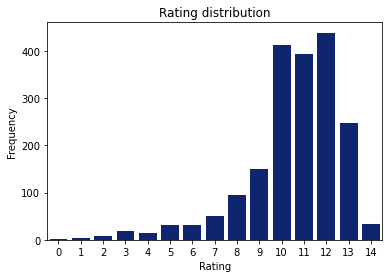

In [2709]:
sns.countplot(data = df, x = 'rating', color = base_color);
plt.title('Rating distribution');
plt.xlabel('Rating')
plt.ylabel('Frequency');

In [2710]:
df.columns

Index(['tweet_id', 'rating', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'source', 'text',
       'jpg_url', 'expanded_urls'],
      dtype='object')

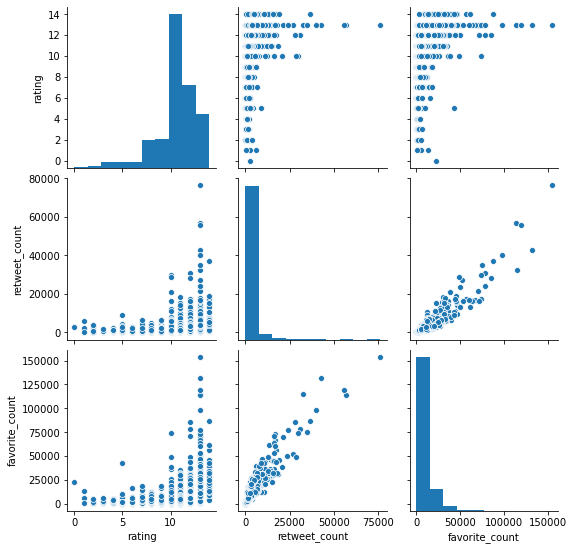

In [2711]:
sns.pairplot(df, vars = ['rating','retweet_count','favorite_count']);

In [2712]:
df.retweet_count.describe()

count     1937.000000
mean      2417.687145
std       4335.266712
min         11.000000
25%        536.000000
50%       1166.000000
75%       2777.000000
max      76248.000000
Name: retweet_count, dtype: float64

In [2713]:
df.favorite_count.describe()

count      1937.000000
mean       8196.880743
std       12078.769521
min          70.000000
25%        1731.000000
50%        3649.000000
75%       10286.000000
max      153893.000000
Name: favorite_count, dtype: float64

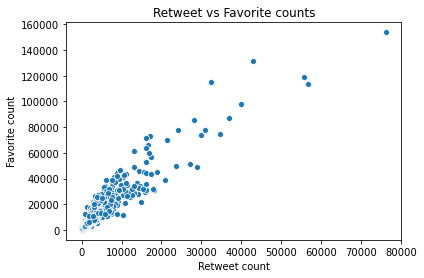

In [2714]:
sns.scatterplot(data = df, x = 'retweet_count', y = 'favorite_count');
plt.title('Retweet vs Favorite counts')
plt.xlabel('Retweet count')
plt.ylabel('Favorite count');

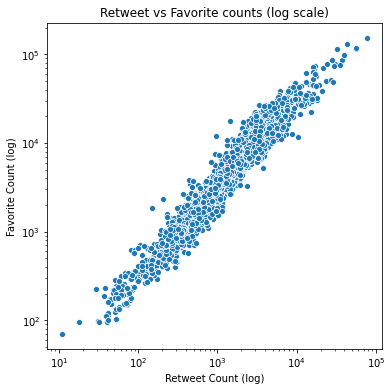

In [2715]:
fig, ax = plt.subplots(figsize=[6,6])
sns.scatterplot(data = df, x = 'retweet_count', y = 'favorite_count');
ax.set(xscale = 'log', yscale= 'log')
plt.title('Retweet vs Favorite counts (log scale)');
plt.xlabel('Retweet Count (log)')
plt.ylabel('Favorite Count (log)');

In [2716]:
df.retweet_count.value_counts().sort_index(ascending=False)

76248    1
56700    1
55589    1
42965    1
39939    1
        ..
32       1
31       1
29       1
18       1
11       1
Name: retweet_count, Length: 1514, dtype: int64

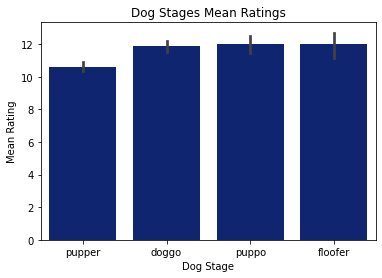

In [2717]:
stage_order = df.dog_stage.value_counts().index[1::]
base_color = sns.color_palette('dark')[0]
sns.barplot(data = df, x = 'dog_stage', y = 'rating', order = stage_order, color = base_color)
plt.title('Dog Stages Mean Ratings')
plt.xlabel('Dog Stage')
plt.ylabel('Mean Rating');

In [2718]:
df_plt = df[df.dog_stage != 'None']

In [2719]:
np.sum(df[df.p1_dog==True].p1.value_counts()>20)

14

In [2720]:
idx = np.sum(df[df.p1_dog==True].p1.value_counts()>20)
breed_order = df.p1.value_counts()[:idx]
most_freq = breed_order[:idx].index

In [2721]:
df_plt = df[df['p1'].isin(most_freq)]

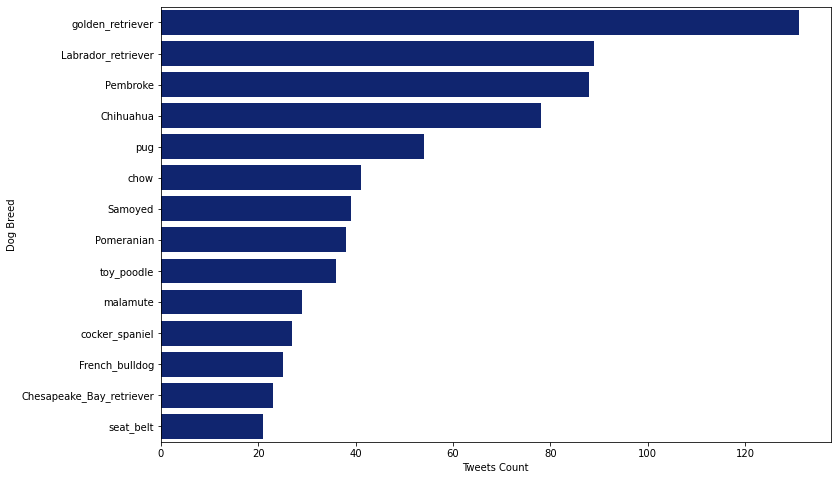

In [2722]:
plt.figure(figsize = [12,8])
sns.countplot(data = df, y = 'p1', order = most_freq, 
              color = base_color);
#for idx, value in enumerate()
plt.ylabel('Dog Breed',fontsize = '10')
plt.xlabel('Tweets Count');

Text(0.5, 1.0, 'Tweets Source')

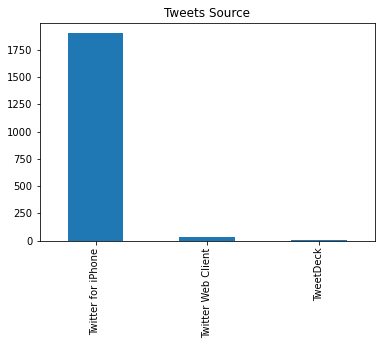

In [2723]:
df.source.value_counts().plot(kind = 'bar');
plt.title('Tweets Source')